In [ ]:
import pandas as pd

try:
    with open('TrainingDataset.csv', 'r') as f:
        header_line = f.readline().strip().split(';')
        columns = [col.strip().replace('"', '') for col in header_line]

        data = []
        for line in f:
            values = line.strip().split()
            if len(values) >= len(columns):
                row = [float(v) for v in values[:11]] + [int(values[-1])]
                data.append(row)

    df = pd.DataFrame(data, columns=columns)
    print("\n--- Sorting by Quality ---")
    print(df.sort_values(by='quality'))

except FileNotFoundError:
    print("Error: File not found.")
except Exception as e:
    print(f"An error occurred: {e}")


--- Sorting by Quality ---
Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []


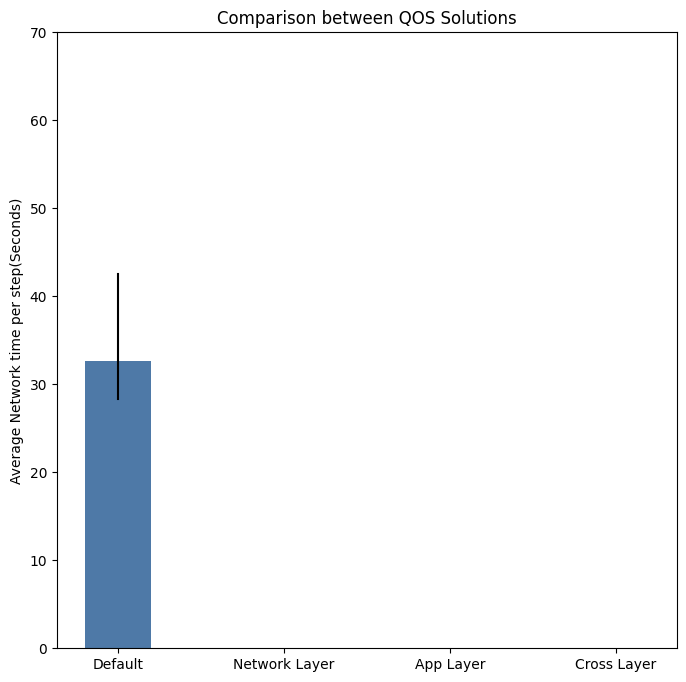

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for multiple experiments
experiments_size = [
    [
    42.559789, 31.169324, 28.445393, 32.687220, 31.446996,
    42.397944, 28.462978, 28.469127, 35.200756, 31.154444,
    39.984668, 28.512475, 31.139925, 32.475694, 28.445710,
    39.671144, 31.141580, 30.058761, 31.319563, 28.378222,
    39.924478, 29.064008, 28.347637, 29.462561, 31.265933,
    42.448592, 28.347636, 28.921440, 34.568894, 28.371432,
    36.903015
],
  [0],

    [0],
    [
      24.670542, 24.698906, 24.699306, 18.652701, 24.699379, 24.625356, 18.055966, 21.516718,
      21.699362, 24.677873, 24.741933, 13.161958, 23.169619, 24.734897, 24.657870
    ]
]

labels = ['Default', 'Network Layer',  'App Layer', 'Cross Layer']

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 8))


# Colors for bars
colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2']
x_pos = np.array([0, 1, 2, 3])
# Loop through each experiment to calculate statistics and plot
for i, experiment in enumerate(experiments_size):
    # Subtract 40 of experiment
    avg = np.mean(experiment)
    min_val = np.min(experiment)
    max_val = np.max(experiment)

    # Custom label: you can modify this line to show any text you want
    label_text = f'{labels[i]}'
    labels[i] = label_text
    # Plot the bars for each experiment
    ax.bar(x_pos[i], avg, color=colors[i], width=0.4, label=label_text)
    # Plot the min-max line (thin line between min and max)
    ax.plot([x_pos[i], x_pos[i]], [min_val, max_val], color='black', linewidth=1.5)

# Set labels
ax.set_xlabel('')
ax.set_ylabel('Average Network time per step(Seconds)')
ax.set_title('Comparison between QOS Solutions')
ax.set_xticks(x_pos)
ax.set_ylim(0)
ax.set_yticks(np.arange(0, 80, 10))
ax.set_xticklabels([f'{labels[i]}' for i in range(len(experiments_size))])


# Show the plot
plt.show()

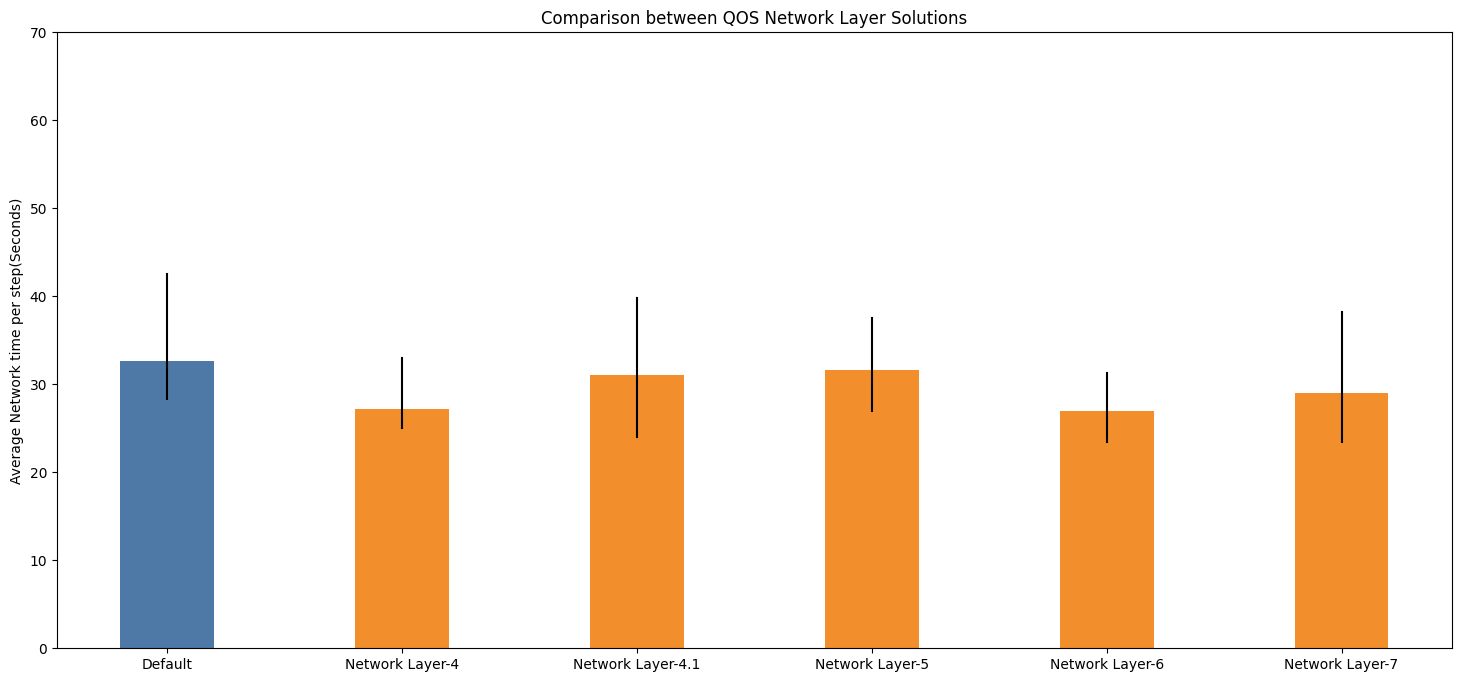

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for multiple experiments
experiments_size = [
    [
    42.559789, 31.169324, 28.445393, 32.687220, 31.446996,
    42.397944, 28.462978, 28.469127, 35.200756, 31.154444,
    39.984668, 28.512475, 31.139925, 32.475694, 28.445710,
    39.671144, 31.141580, 30.058761, 31.319563, 28.378222,
    39.924478, 29.064008, 28.347637, 29.462561, 31.265933,
    42.448592, 28.347636, 28.921440, 34.568894, 28.371432,
    36.903015],

    # [
    # 43.667326, 32.088637, 29.067214, 36.168210, 31.780227, 42.993145, 29.057032, 28.993182,
    # 41.088977, 31.869192, 40.250039, 29.193341, 31.853289, 34.910784, 29.278129, 40.298388,
    # 32.058937, 31.834646, 34.078226, 29.141747, 42.318863
    # ],

    # [31.850969, 29.131416, 32.079596, 31.901388, 40.660599, 29.240758, 29.201918, 36.841436,
    #  31.162355, 39.931848, 29.087695, 31.872100, 30.332536, 29.043091, 38.379059, 31.813120,
    #  32.128266, 42.802970, 29.073575, 40.565666],

    # [
    #   31.878792, 29.155346, 32.275304, 31.898374, 40.805848, 29.094123, 29.151261, 37.401311,
    #   30.875075, 39.774861, 29.098091, 31.764044, 30.347881, 29.051398, 38.683125, 32.006363,
    #   29.014871, 29.622611, 29.123057, 45.281261, 37.160514],

    [
      30.963855, 26.883337, 25.145123, 28.193186, 27.265843, 24.988474, 27.509770, 27.431847,
      25.541824, 25.294126, 28.285284, 26.849116, 25.413654, 28.085338, 27.723999, 25.210555,
      26.450964, 27.813595, 32.937131, 25.791889, 27.910702
    ],

    [
      39.273498, 26.539363, 28.484874, 35.978157, 32.404930,
      39.542732, 23.990438, 33.862910, 26.988663, 26.124304,
      39.817901, 27.471562, 31.017812, 33.212683, 30.926144,
      24.048303, 31.893925, 34.567432, 29.525387, 25.987417
    ],

    [37.123698, 28.093477, 34.034520, 28.887206, 34.318886, 35.514231, 27.369771, 33.903608,
     32.289587, 30.929605, 32.708303, 27.427173, 37.486497, 27.446980, 30.202803, 33.116188,
     30.208022, 32.981911, 26.980632, 31.340001],

    [
        26.493975, 26.591885, 31.282963, 30.043383, 23.434224, 29.082470, 28.998247, 27.047849, 24.655957, 23.453477,
        24.668882, 29.674749, 30.288186, 27.586286, 23.578979, 30.664262, 28.487474, 25.621779, 23.692379, 25.869938,
        25.089246
    ],
    [
      30.693073, 25.845381, 26.494575, 26.222868, 34.747216,
      23.476422, 36.565325, 26.158774, 36.744663, 23.573889,
      25.243135, 30.056181, 23.977571, 23.391690, 37.916990,
      26.244734, 36.029575, 23.428941, 38.247144, 24.895703
    ]
    # [
    #     26.630331, 28.520923, 36.423563, 30.748671, 40.942896,
    #     24.281455, 35.059791, 27.112122, 25.872340, 40.203663,
    #     27.217094, 31.787960, 32.520618, 31.072673, 24.256381,
    #     31.907464, 35.509949, 29.217399, 24.145481
    # ]

]

labels = ['Default',  'Network Layer-4', 'Network Layer-4.1', 'Network Layer-5', 'Network Layer-6',  'Network Layer-7']

# Set up the figure
fig, ax = plt.subplots(figsize=(18, 8))


# Colors for bars
colors = ['#4E79A7', '#F28E2B', '#F28E2B', '#F28E2B', '#F28E2B', '#F28E2B', '#F28E2B', '#F28E2B', '#F28E2B', '#F28E2B']
x_pos = np.array([0, 1, 2, 3, 4, 5])
# Loop through each experiment to calculate statistics and plot
for i, experiment in enumerate(experiments_size):
    # Subtract 40 of experiment
    avg = np.mean(experiment)
    min_val = np.min(experiment)
    max_val = np.max(experiment)

    # Custom label: you can modify this line to show any text you want
    label_text = f'{labels[i]}'
    labels[i] = label_text
    # Plot the bars for each experiment
    ax.bar(x_pos[i], avg, color=colors[i], width=0.4, label=label_text)
    # Plot the min-max line (thin line between min and max)
    ax.plot([x_pos[i], x_pos[i]], [min_val, max_val], color='black', linewidth=1.5)

# Set labels
ax.set_xlabel('')
ax.set_ylabel('Average Network time per step(Seconds)')
ax.set_title('Comparison between QOS Network Layer Solutions')
ax.set_xticks(x_pos)
ax.set_ylim(0)
ax.set_yticks(np.arange(0, 80, 10))
ax.set_xticklabels([f'{labels[i]}' for i in range(len(experiments_size))])


# Show the plot
plt.show()

# EXP4.2
# [31.888863, 27.704012, 27.722868, 30.532321, 29.143676, 46.767588, 25.660104, 29.766165, 28.177349, 26.830521,
#    31.753098, 27.099285, 28.829891, 30.398146, 29.255047, 45.057092, 28.284270, 30.017816, 28.093178, 26.134102,
#    27.832037]


#EXP4.3 P=1
# [34.510365, 31.276689, 31.538663, 35.260559, 33.563980, 43.191773, 29.904962, 34.829959, 29.799933, 29.432587,
#    35.951307, 30.600906, 33.294493, 32.740030, 33.522546, 26.096233, 32.945335, 35.235845, 31.866830, 46.053221,
#    29.029862]
#EXP4.3 P=0.5

#EXP4.3 P=0

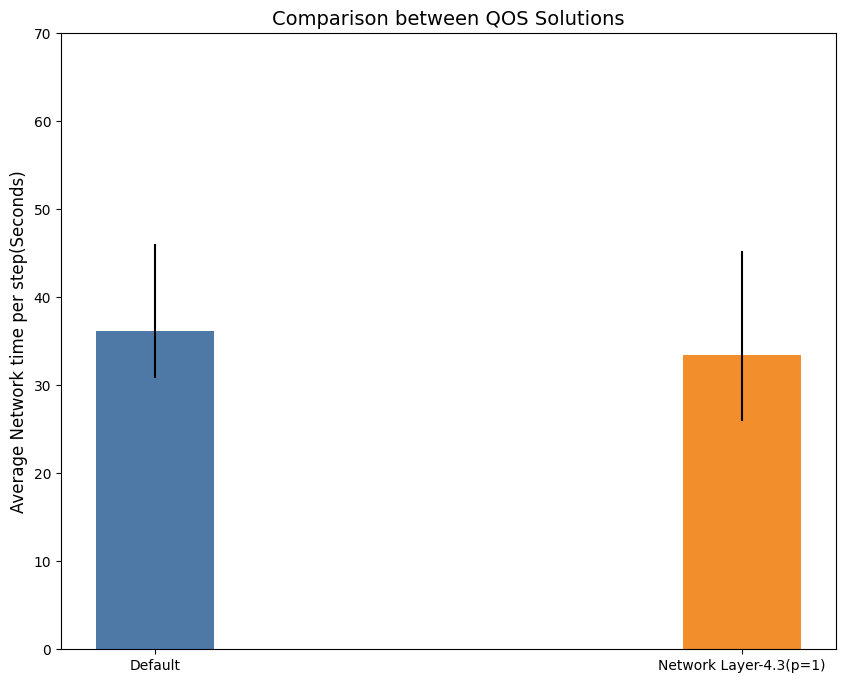

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for multiple experiments
experiments_size = [
    [
      44.639689, 33.410794, 30.901408, 37.707991, 33.558491, 45.986045, 31.093734, 30.989733, 42.729872, 33.839144,
      42.315093, 31.296625, 33.864953, 37.098581, 31.013936, 42.526223, 33.868198, 33.824563, 34.350193, 31.022277,
      44.379792
    ],
  #   [
  #     31.178373, 27.921600, 27.715596, 30.430919, 28.757494, 45.305931, 27.441990, 29.583171, 27.903592, 26.710377,
  #     31.388838, 27.217312, 28.890944, 30.483142, 29.139310, 45.768489, 28.156536, 30.193184, 28.000461, 25.870560,
  #     27.776784],

  #   [
  #     39.273498, 26.539363, 28.484874, 35.978157, 32.404930,
  #     39.542732, 23.990438, 33.862910, 26.988663, 26.124304,
  #     39.817901, 27.471562, 31.017812, 33.212683, 30.926144,
  #     24.048303, 31.893925, 34.567432, 29.525387, 25.987417
  #   ],

  # [31.888863, 27.704012, 27.722868, 30.532321, 29.143676, 45.767588, 25.660104, 29.766165, 28.177349, 26.830521,
  #  31.753098, 27.099285, 28.829891, 30.398146, 29.255047, 45.057092, 28.284270, 30.017816, 28.093178, 26.134102,
  #  27.832037],

  #     [ 31.059132, 28.033274, 27.810505, 30.340962, 28.750738, 45.926870, 25.541154, 30.349038, 27.507391, 26.160838,
  #   31.715873, 26.920381, 28.790358, 30.727875, 29.178741, 45.179815, 28.000975, 29.465938, 27.795966, 25.742860,
  #   27.973519],
  #   [32.853686, 29.982959, 29.485506, 32.615534, 31.118959, 25.575448, 31.428091, 31.721354, 29.335477, 27.739547,
  #     32.900736, 28.670107, 30.516777, 32.377589, 30.906543, 45.300089, 25.391210, 32.372053, 29.575057, 26.031745,
  #     30.085799],
    [34.510365, 31.276689, 31.538663, 35.260559, 33.563980, 45.191773, 29.904962, 34.829959, 29.799933, 29.432587,
    35.951307, 30.600906, 33.294493, 32.740030, 33.522546, 26.096233, 32.945335, 35.235845, 31.866830, 45.053221,
    29.029862]
]

# 4.4 p=1
# [28.940323, 30.478346, 38.311153, 34.328818, 40.323871, 31.076666, 35.696169, 29.929608, 28.148589, 43.147348,
#    29.075000, 33.157997, 35.426536, 32.643403, 26.708205, 34.065358, 36.525491, 31.360155, 26.421316, 41.310672]

#  4.4 p=0.5
    # [
    #     27.626189, 30.287745, 29.115177, 25.691611, 28.539823, 29.702661, 27.898190, 26.564752, 31.392233,
    #     27.159492, 28.645358, 30.288191, 29.296958, 25.958871, 27.230753, 29.904443, 28.063104, 26.035499
    # ]

#  4.4 p=0
    # [
    #     31.026558, 27.981992, 27.670851, 30.550539, 29.004065, 47.979642, 27.792808, 30.296861, 27.633171, 26.376559,
    #     31.643915, 26.863889, 29.004417, 30.539549, 29.070980, 25.772316, 29.203208, 30.560148, 27.609297, 25.654043
    # ]




labels = ['Default', 'Network Layer-4.3(p=1)']

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 8))


# Colors for bars
colors = ['#4E79A7', '#F28E2B', '#F28E2B', '#F28E2B', '#F28E2B', '#F28E2B', '#F28E2B', '#F28E2B', '#F28E2B', '#F28E2B']
x_pos = np.array([0, 1])
# Loop through each experiment to calculate statistics and plot
for i, experiment in enumerate(experiments_size):
    # Subtract 40 of experiment
    avg = np.mean(experiment)
    min_val = np.min(experiment)
    max_val = np.max(experiment)

    # Custom label: you can modify this line to show any text you want
    label_text = f'{labels[i]}'
    labels[i] = label_text
    # Plot the bars for each experiment
    ax.bar(x_pos[i], avg, color=colors[i], width=0.2, label=label_text)
    # Plot the min-max line (thin line between min and max)
    ax.plot([x_pos[i], x_pos[i]], [min_val, max_val], color='black', linewidth=1.5)

# Set labels
ax.set_xlabel('')
ax.set_ylabel('Average Network time per step(Seconds)',fontsize=12)
ax.set_title('Comparison between QOS Solutions', fontsize=14)
ax.set_xticks(x_pos)
ax.set_ylim(0)
ax.set_yticks(np.arange(0, 80, 10))
ax.set_xticklabels([f'{labels[i]}' for i in range(len(experiments_size))])


# Show the plot
plt.show()

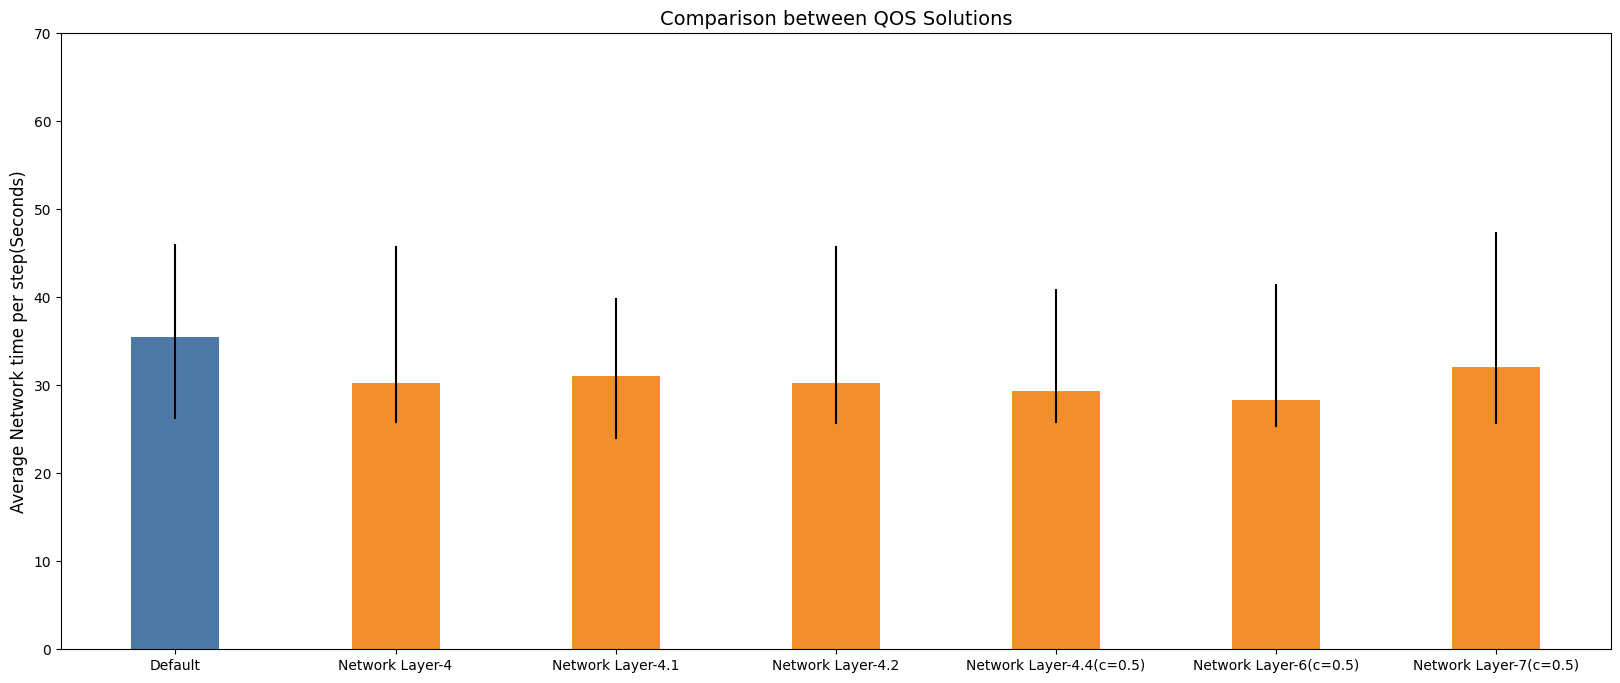

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for multiple experiments
experiments_size = [
    [
      43.639689, 33.410794, 30.901408, 37.707991, 31.558491, 45.986045, 31.093734, 30.989733, 42.729872, 33.839144,
      42.315093, 31.296625, 33.864953, 37.098581, 31.013936, 42.526223, 33.868198, 33.824563, 34.350193, 31.022277,
      42.379792, 26.285532,
    ],
    [
      31.178373, 27.921600, 27.715596, 30.430919, 28.757494, 45.305931, 27.441990, 29.583171, 27.903592, 26.710377,
      31.388838, 27.217312, 28.890944, 30.483142, 29.139310, 45.768489, 28.156536, 30.193184, 28.000461, 25.870560,
      27.776784],

    [
      39.273498, 26.539363, 28.484874, 35.978157, 32.404930,
      39.542732, 23.990438, 33.862910, 26.988663, 26.124304,
      39.817901, 27.471562, 31.017812, 33.212683, 30.926144,
      24.048303, 31.893925, 34.567432, 29.525387, 25.987417
    ],

  [31.888863, 27.704012, 27.722868, 30.532321, 29.143676, 45.767588, 25.660104, 29.766165, 28.177349, 26.830521,
   31.753098, 27.099285, 28.829891, 30.398146, 29.255047, 45.057092, 28.284270, 30.017816, 28.093178, 26.134102,
   27.832037],
    [
        31.378670, 27.829716, 28.005344, 30.591226, 29.248017, 25.877628, 28.979579,
        29.716941, 27.818071, 26.557530, 31.279883, 27.244392, 29.140923, 30.780413,
        29.540130, 40.795286, 29.741478, 28.754817, 27.919530, 26.017942
    ],
    [
    31.250765, 27.117450, 26.850379, 28.610165, 28.338878, 25.522318, 27.992569,
    28.210994, 27.403159, 26.093914, 30.311129, 26.191033, 28.059223, 28.019830,
    27.143041, 41.355848, 28.313311, 27.533795, 26.421585, 25.408499
  ],
    [
    31.657870, 29.365816, 26.863731, 38.359812, 28.274001, 44.777831, 27.951754,
    38.982610, 26.853152, 47.265991, 30.544455, 27.453447, 27.977391, 26.706173,
    25.683267, 26.181893, 28.846934, 33.946123, 29.588803, 45.226677
    ]
]

# 4.4 p=1


#  4.4 p=0.5


# #  4.4 p=0
#     [
#         31.026558, 27.981992, 27.670851, 30.550539, 29.004065, 47.979642, 27.792808, 30.296861, 27.633171, 26.376559,
#         31.643915, 26.863889, 29.004417, 30.539549, 29.070980, 25.772316, 29.203208, 30.560148, 27.609297, 25.654043
#     ]




labels = ['Default', 'Network Layer-4', 'Network Layer-4.1', 'Network Layer-4.2', 'Network Layer-4.4(c=0.5)', 'Network Layer-6(c=0.5)', 'Network Layer-7(c=0.5)']

# Set up the figure
fig, ax = plt.subplots(figsize=(20, 8))


# Colors for bars
colors = ['#4E79A7', '#F28E2B', '#F28E2B', '#F28E2B', '#F28E2B', '#F28E2B', '#F28E2B', '#F28E2B', '#F28E2B', '#F28E2B']
x_pos = np.array([0, 1, 2, 3, 4, 5, 6])
# Loop through each experiment to calculate statistics and plot
for i, experiment in enumerate(experiments_size):
    # Subtract 40 of experiment
    avg = np.mean(experiment)
    min_val = np.min(experiment)
    max_val = np.max(experiment)

    # Custom label: you can modify this line to show any text you want
    label_text = f'{labels[i]}'
    labels[i] = label_text
    # Plot the bars for each experiment
    ax.bar(x_pos[i], avg, color=colors[i], width=0.4, label=label_text)
    # Plot the min-max line (thin line between min and max)
    ax.plot([x_pos[i], x_pos[i]], [min_val, max_val], color='black', linewidth=1.5)

# Set labels
ax.set_xlabel('')
ax.set_ylabel('Average Network time per step(Seconds)',fontsize=12)
ax.set_title('Comparison between QOS Solutions', fontsize=14)
ax.set_xticks(x_pos)
ax.set_ylim(0)
ax.set_yticks(np.arange(0, 80, 10))
ax.set_xticklabels([f'{labels[i]}' for i in range(len(experiments_size))])


# Show the plot
plt.show()

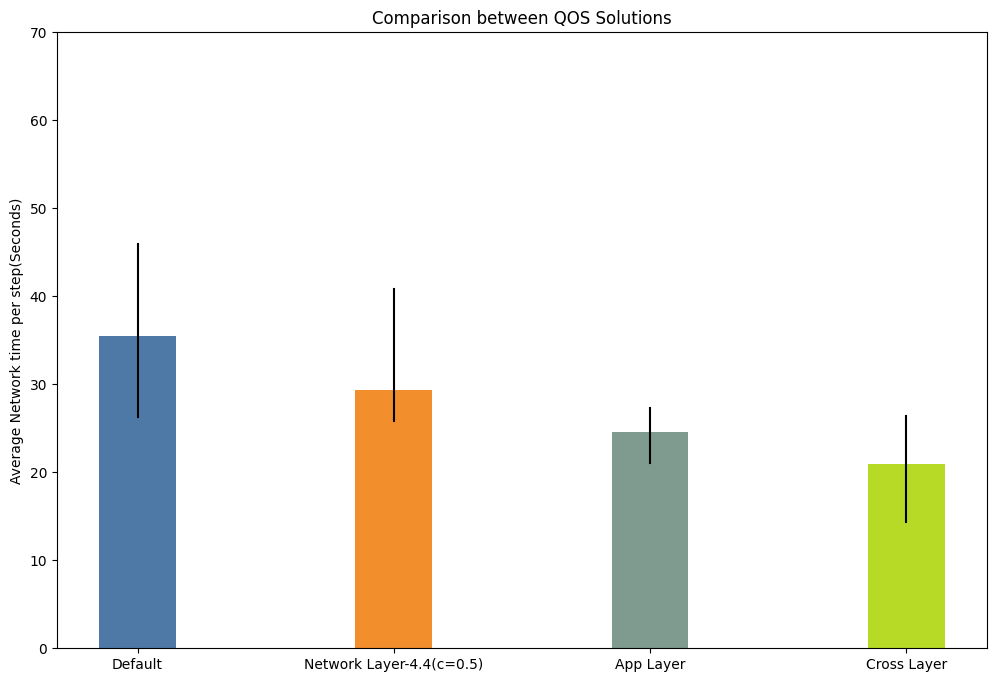

In [ ]:



import matplotlib.pyplot as plt
import numpy as np

# Data for multiple experiments
experiments_size = [
    [
      43.639689, 33.410794, 30.901408, 37.707991, 31.558491, 45.986045, 31.093734, 30.989733, 42.729872, 33.839144,
      42.315093, 31.296625, 33.864953, 37.098581, 31.013936, 42.526223, 33.868198, 33.824563, 34.350193, 31.022277,
      42.379792, 26.285532,
    ],

    [
        31.378670, 27.829716, 28.005344, 30.591226, 29.248017, 25.877628, 28.979579,
        29.716941, 27.818071, 26.557530, 31.279883, 27.244392, 29.140923, 30.780413,
        29.540130, 40.795286, 29.741478, 28.754817, 27.919530, 26.017942
    ],
    [
      24.262276, 26.432121, 22.437271, 27.052922, 22.126613, 26.477673, 26.349049,
      22.595532, 24.774837, 22.662626, 26.908913, 27.153230, 22.433199, 26.299521,
      21.951440, 27.283082, 23.925920, 22.400719, 25.929394, 21.101027
    ],
    [
        20.599089, 23.033242, 20.493102, 22.347056, 14.300882,
        24.883929, 24.851027, 16.044461, 20.431626, 18.650569,
        22.450400, 22.185172, 20.224786, 24.301024, 26.401766,
        19.345646, 22.047929, 19.009654, 21.101839, 16.055226,
        21.411000
    ],
]

labels = ['Default', 'Network Layer-4.4(c=0.5)', 'App Layer', 'Cross Layer']

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 8))


# Colors for bars
colors = ['#4E79A7', '#F28E2B', '#7F9A8F', '#B6DA25', '#A22F2C', '#F28E2B', '#F28E2B', '#F28E2B', '#F28E2B', '#F28E2B']
x_pos = np.array([0, 1, 2, 3])
# Loop through each experiment to calculate statistics and plot
for i, experiment in enumerate(experiments_size):
    # Subtract 40 of experiment
    avg = np.mean(experiment)
    min_val = np.min(experiment)
    max_val = np.max(experiment)

    # Custom label: you can modify this line to show any text you want
    label_text = f'{labels[i]}'
    labels[i] = label_text
    # Plot the bars for each experiment
    ax.bar(x_pos[i], avg, color=colors[i], width=0.3, label=label_text)
    # Plot the min-max line (thin line between min and max)
    ax.plot([x_pos[i], x_pos[i]], [min_val, max_val], color='black', linewidth=1.5)

# Set labels
ax.set_xlabel('')
ax.set_ylabel('Average Network time per step(Seconds)')
ax.set_title('Comparison between QOS Solutions')
ax.set_xticks(x_pos)
ax.set_ylim(0)
ax.set_yticks(np.arange(0, 80, 10))
ax.set_xticklabels([f'{labels[i]}' for i in range(len(experiments_size))])


# Show the plot
plt.show()

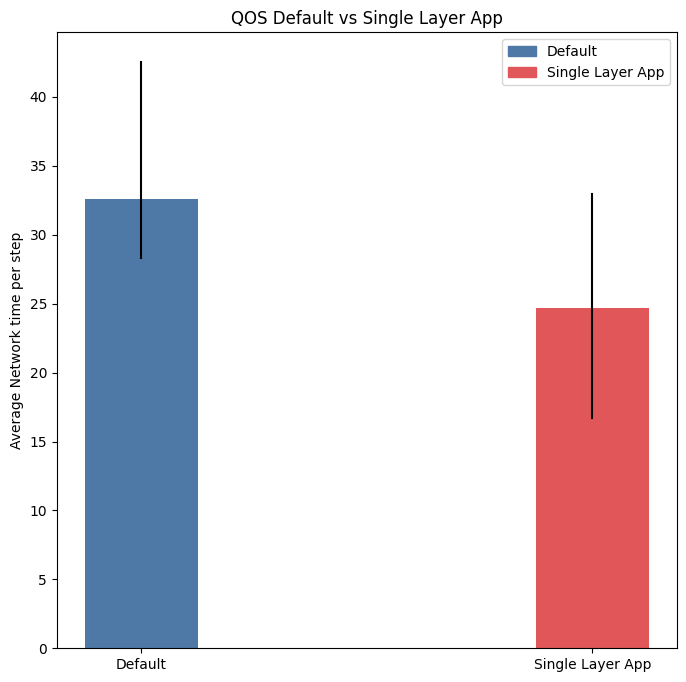

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
[32.263315, 31.200615, 28.451515, 28.809159, 31.164600, 31.191359, 28.404643, 28.408667, 31.425404,
31.439196, 28.481491, 28.409202, 31.191463, 31.161856, 28.380427, 28.729310, 31.191630, 31.244971,
28.824093, 28.495247, 31.337634, 31.116606, 28.398577, 28.697315, 31.179760, 31.483833, 28.397788,
28.444859, 31.562476, 30.621806, 28.704738, 28.551933]
# Data for multiple experiments
experiments_size = [
    [
    42.559789, 31.169324, 28.445393, 32.687220, 31.446996,
    42.397944, 28.462978, 28.469127, 35.200756, 31.154444,
    39.984668, 28.512475, 31.139925, 32.475694, 28.445710,
    39.671144, 31.141580, 30.058761, 31.319563, 28.378222,
    39.924478, 29.064008, 28.347637, 29.462561, 31.265933,
    42.448592, 28.347636, 28.921440, 34.568894, 28.371432,
    36.903015],
    [
      19.492644, 24.409740, 20.776893, 28.415102, 31.593399,
      19.441842, 24.065137, 30.958120, 22.762679, 32.955399,
      17.523919, 28.950160, 26.195415, 18.403008, 29.957961,
      22.456599, 26.175904, 24.155786, 16.702809, 28.669010
    ]
]

labels = [
    'Default', 'Single Layer App'
]

# Define colors
cross_layer_color = '#76B7B2'
single_layer_color = '#E15759'
color_mapping = {
    'Default': '#4E79A7',
    'Cross Layer - 200': cross_layer_color,
    'Cross Layer - 400': cross_layer_color,
    'Cross Layer - avg': cross_layer_color,
    'Single Layer App - 400': single_layer_color,
    'Single Layer App - 200': single_layer_color,
    'Single Layer App': single_layer_color
}

# Compute statistics and sorting
stats = []
for i, exp in enumerate(experiments_size):
    avg = np.mean(exp)
    min_val = np.min(exp)
    max_val = np.max(exp)
    stats.append((avg, min_val, max_val, labels[i], color_mapping[labels[i]]))

# Sort by avg from highest to lowest
stats.sort(reverse=True, key=lambda x: x[0])

# Extract sorted values
sorted_avg = [s[0] for s in stats]
sorted_min = [s[1] for s in stats]
sorted_max = [s[2] for s in stats]
sorted_labels = [s[3] for s in stats]
sorted_colors = [s[4] for s in stats]

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 8))
x_pos = np.arange(len(sorted_avg))

# Plot bars with assigned colors
for i in range(len(sorted_avg)):
    ax.bar(x_pos[i], sorted_avg[i], color=sorted_colors[i], width=0.25)
    ax.plot([x_pos[i], x_pos[i]], [sorted_min[i], sorted_max[i]], color='black', linewidth=1.5)

# Set labels
ax.set_xlabel('')
ax.set_ylabel('Average Network time per step')
ax.set_title('QOS Default vs Single Layer App')
ax.set_xticks(x_pos)
ax.set_xticklabels(sorted_labels)
ax.set_ylim(0)

# Add legend
handles = [
    plt.Rectangle((0,0),1,1, color='#4E79A7', label="Default"),
    plt.Rectangle((0,0),1,1, color=single_layer_color, label="Single Layer App"),
    # plt.Rectangle((0,0),1,1, color=cross_layer_color, label="Cross Layer")
]
ax.legend(handles=handles, loc='upper right')

plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Simulated traffic data (replace with real data)
time = np.linspace(0, 900, 900)
traffic_enp7s0 = np.sin(2 * np.pi * 0.01 * time) + np.random.normal(0, 0.1, len(time))

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
traffic_scaled = scaler.fit_transform(traffic_enp7s0.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 50
X, y = create_sequences(traffic_scaled, sequence_length)

# Reshape for LSTM input
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile and train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=20, batch_size=32)

# Predict future traffic
future_steps = 2700
predictions = []
current_seq = traffic_scaled[-sequence_length:].reshape(1, sequence_length, 1)

for _ in range(future_steps):
    next_val = model.predict(current_seq)[0]
    predictions.append(next_val)
    current_seq = np.append(current_seq[:, 1:, :], [[next_val]], axis=1)

# Inverse transform predictions
predicted_traffic = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Plot actual and predicted traffic
plt.figure(figsize=(12, 6))
plt.plot(time, traffic_enp7s0, label='Actual Traffic')
plt.plot(np.arange(900, 900 + future_steps), predicted_traffic, label='Predicted Traffic')
plt.xlabel('Time (s)')
plt.ylabel('Bandwidth Usage')
plt.legend()
plt.title('LSTM Traffic Prediction')
plt.show()

<ipython-input-1-73fc561c314c>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(


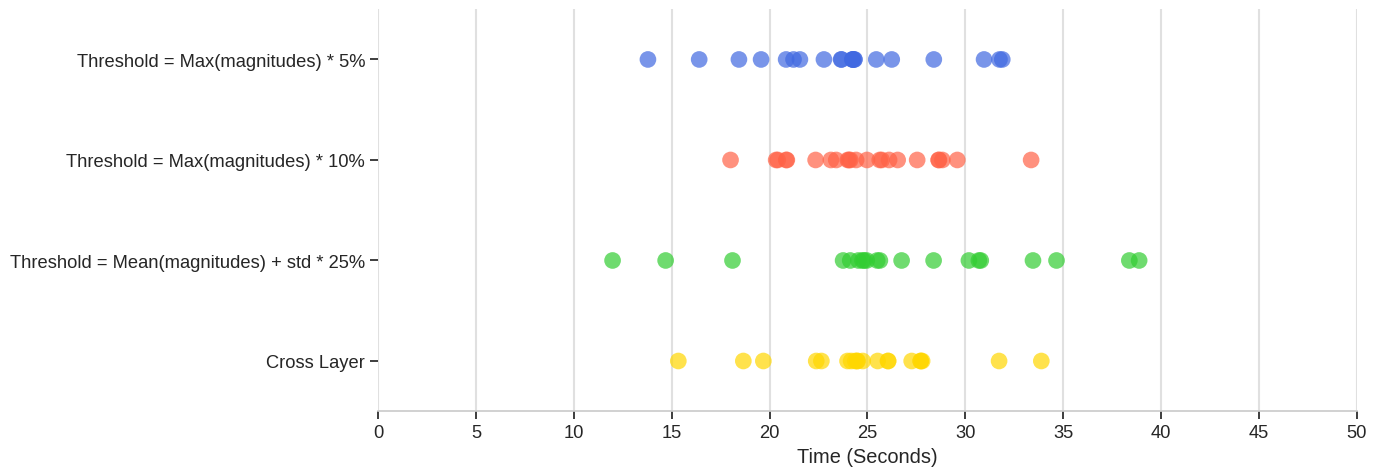

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Example values for multiple categories
categories = {
    # 'Threshold = Max(magnitudes) * 5%': [
    #     26.426367, 24.388324, 30.864340, 11.431739, 17.333417, 26.796327,
    #     19.227148, 24.247251, 29.972853, 25.617360, 25.725427, 28.247755, 23.708235,
    #     22.797954, 26.366870, 28.509786, 24.764107, 31.668131, 14.157797, 24.242041
    # ],

    'Threshold = Max(magnitudes) * 5%':[
        23.675198, 31.889674, 31.748102, 26.240454, 28.390259, 23.650916, 25.449471, 24.320731,
        22.775060, 18.430523, 19.562897, 24.247633, 21.220371, 13.779775, 24.227443, 24.249971,
        16.399158, 21.546691, 20.843053, 30.958998, 24.337799],

    'Threshold = Max(magnitudes) * 10%': [
        27.540186, 25.726620, 20.847643, 28.828940, 22.350595, 23.403142, 23.994581,
        26.543134, 24.053232, 25.625842, 18.001961, 29.591122, 28.634696, 20.332828,
        24.122616, 26.105056, 24.419887, 20.878908, 33.364281, 24.975142, 20.413091,
        28.653030, 23.128866],
    'Threshold = Mean(magnitudes) + std * 25%': [
      34.662239, 23.755056, 38.384909, 14.684994, 18.102110, 25.634431, 38.884972, 26.745297,
      30.790763, 28.380525, 24.119903, 24.539046, 30.694172, 24.960086, 25.498526,
      24.828049, 33.459315, 11.972572, 24.744304, 30.184902],
    'Cross Layer':
     [   25.522164, 24.162244, 22.644791, 19.679059, 31.726613, 27.716591, 15.332769, 24.465830,
         26.056484, 24.492937, 18.655683, 27.794131, 22.380769, 23.980702, 27.725510, 24.377446,
         24.757425, 33.885569, 27.259166, 26.050620]
}

# Prepare the DataFrame
data = []
for category, values in categories.items():
    for value in values:
        data.append({'Category': category, 'Time (Seconds)': value})

df = pd.DataFrame(data)

# Create figure
plt.figure(figsize=(14, 5))

# Create the strip plot with jittered points
ax = sns.stripplot(
    x='Time (Seconds)',
    y='Category',
    data=df,
    palette=['#4169E1', '#FF6347', '#32CD32', '#FFD700'],  # Colors for up to 4 categories
    size=12,
    jitter=0,
    alpha=0.7,
    linewidth=0
)

# Set appropriate x-axis range with some padding
min_val = 0  # Start from 0
max_val = 50  # Slightly above the maximum value
plt.xlim(min_val, max_val)

# Create x-ticks at regular intervals
x_ticks = np.arange(0, max_val + 5, 5)
ax.set_xticks(x_ticks)

# Remove the top, right and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add vertical lines at each tick
for x in x_ticks:
    plt.axvline(x=x, color='lightgray', linestyle='-', alpha=0.7, zorder=0)

# Remove grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Remove y-axis label as it's redundant
ax.set_ylabel('')

# Add a custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=14, label=category, alpha=0.7)
    for category, color in zip(categories.keys(), ['#4169E1', '#FF6347', '#32CD32', '#FFD700'])
]
# ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)

# Adjust appearance
plt.tight_layout()

# Show the plot
plt.show()


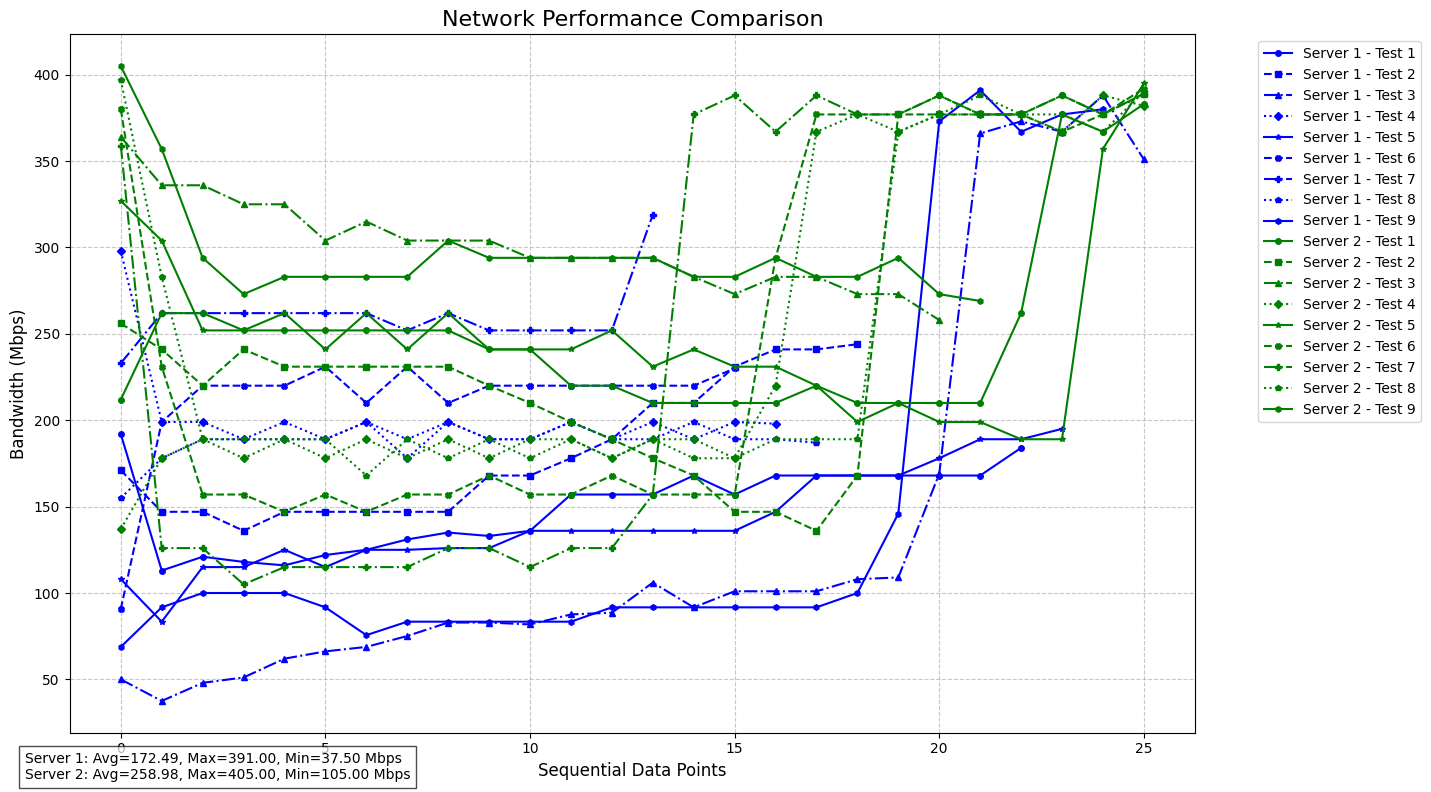

In [ ]:
import matplotlib.pyplot as plt
import re

def parse_log_file(file_path):
    """Parse the log file to extract bandwidth measurements."""
    data_points = []
    current_test = None
    test_runs = {}

    with open(file_path, 'r') as f:
        for line in f:
            # Check if this is a timestamp line starting a new test
            if 'UTC 2025: Running iperf3 test' in line:
                timestamp = line.split('UTC 2025')[0].strip()
                current_test = timestamp
                test_runs[current_test] = []
                continue

            # Check if this is a data point line (format: "1.00:121.00")
            match = re.match(r'(\d+\.\d+):(\d+\.?\d*)', line)
            if match and current_test:
                seconds = float(match.group(1))
                bandwidth = float(match.group(2))

                # Only include non-zero bandwidth values (skip the sleeping periods)
                if bandwidth > 0:
                    test_runs[current_test].append((seconds, bandwidth))

    return test_runs

def plot_network_performance(file_paths, labels):
    """Plot network performance from multiple log files."""
    plt.figure(figsize=(15, 8))

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
    markers = ['o', 's', '^', 'D', '*', 'X', 'P', 'p', 'h', 'H']

    for i, file_path in enumerate(file_paths):
        test_runs = parse_log_file(file_path)

        # Plot each test run with a different line style within the same color
        for j, (timestamp, points) in enumerate(test_runs.items()):
            # Use sequential points for x-axis
            x = range(len(points))
            y = [p[1] for p in points]

            # For each file use different color, and for each test run use different line style
            color = colors[i % len(colors)]
            linestyle = ['-', '--', '-.', ':'][j % 4]
            marker = markers[j % len(markers)]

            label = f"{labels[i]} - Test {j+1}"
            plt.plot(x, y, color=color, linestyle=linestyle, marker=marker,
                     markersize=4, label=label)

    plt.title('Network Performance Comparison', fontsize=16)
    plt.xlabel('Sequential Data Points', fontsize=12)
    plt.ylabel('Bandwidth (Mbps)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Adjust legend for readability
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

    # Add text with statistics for each file
    stat_text = []
    for i, file_path in enumerate(file_paths):
        test_runs = parse_log_file(file_path)
        all_bandwidths = []

        for points in test_runs.values():
            all_bandwidths.extend([p[1] for p in points])

        if all_bandwidths:
            avg_bandwidth = sum(all_bandwidths) / len(all_bandwidths)
            max_bandwidth = max(all_bandwidths)
            min_bandwidth = min(all_bandwidths)

            stats_text = f"{labels[i]}: Avg={avg_bandwidth:.2f}, Max={max_bandwidth:.2f}, Min={min_bandwidth:.2f} Mbps"
            stat_text.append(stats_text)

    # Add stats as text box
    plt.figtext(0.02, 0.02, '\n'.join(stat_text), fontsize=10,
                bbox=dict(facecolor='white', alpha=0.7))

    plt.tight_layout()
    plt.subplots_adjust(right=0.8)  # Make room for the legend

    # Save the figure
    plt.savefig('network_performance.png', dpi=300, bbox_inches='tight')
    plt.show()

# Specify your file paths
file_paths = ['s1.txt', 's2.txt']  # Use the correct paths where your files are located
labels = ["Server 1", "Server 2"]

# Plot the network performance
plot_network_performance(file_paths, labels)

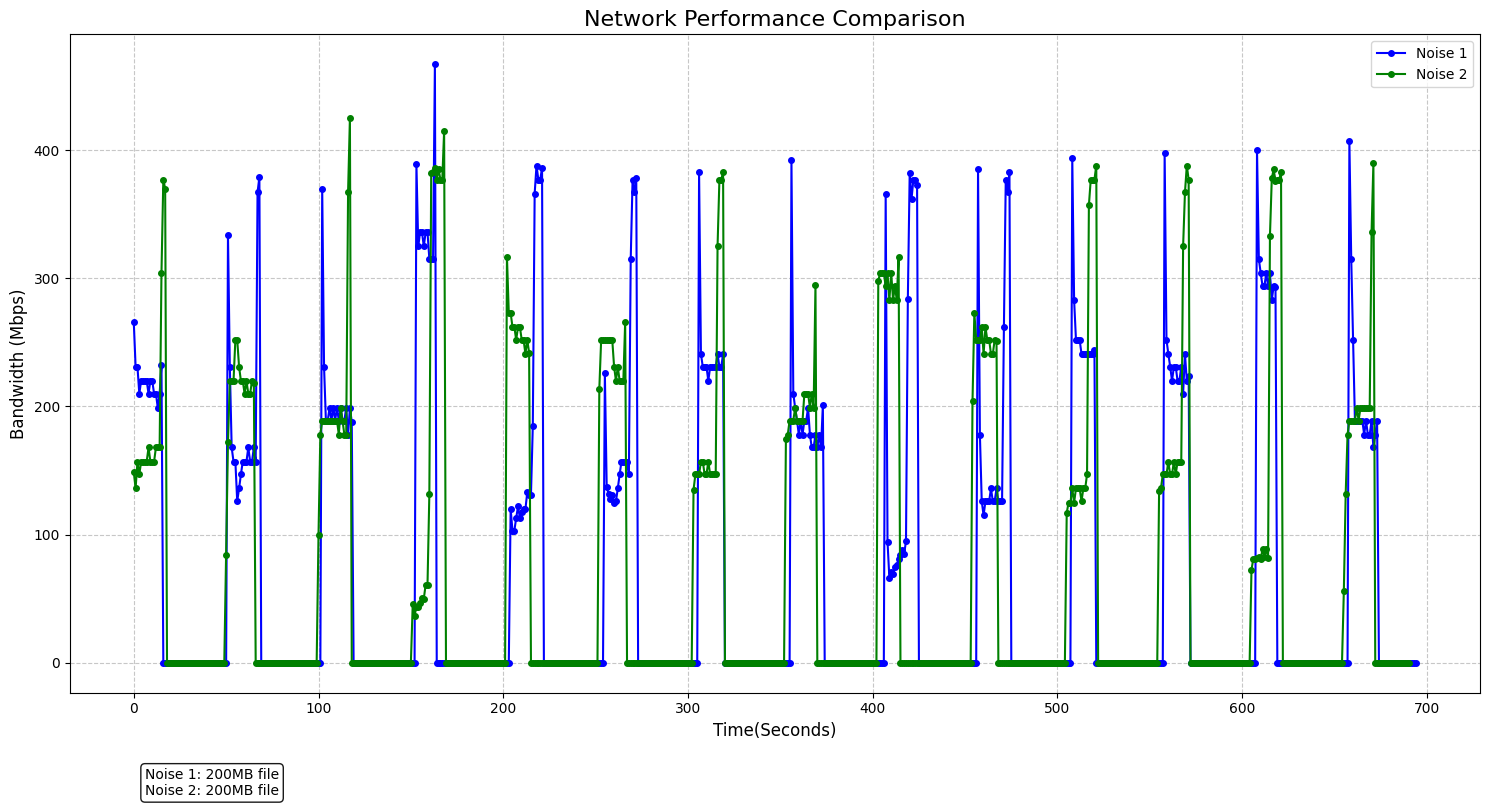

In [ ]:
import matplotlib.pyplot as plt
import re

def parse_log_file(file_path):
    """Parse the log file to extract bandwidth measurements."""
    bandwidth_values = []

    with open(file_path, 'r') as f:
        for line in f:
            # Check if this is a data point line (format: "1.00:121.00")
            match = re.match(r'(\d+\.\d+):(\d+\.?\d*)', line)
            if match:
                seconds = float(match.group(1))
                bandwidth = float(match.group(2))

                # Include all bandwidth values
                bandwidth_values.append(bandwidth)

    return bandwidth_values

def plot_network_performance(file_paths, labels):
    """Plot network performance from multiple log files as consecutive lines."""
    fig, ax = plt.subplots(figsize=(15, 8))

    colors = ['b', 'g', 'r', 'c', 'm']

    # Store stats for display
    stats = []

    for i, file_path in enumerate(file_paths):
        # Get all bandwidth values
        bandwidth_values = parse_log_file(file_path)

        if bandwidth_values:
            # Plot as a single consecutive line
            x = range(len(bandwidth_values))
            ax.plot(x, bandwidth_values, color=colors[i],
                   marker='o', markersize=4, label=labels[i])

            stats.append(f"{labels[i]}: 200MB file")

    ax.set_title('Network Performance Comparison', fontsize=16)
    ax.set_xlabel('Time(Seconds)', fontsize=12)
    ax.set_ylabel('Bandwidth (Mbps)', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)

    # Add legend
    ax.legend(loc='upper right', fontsize=10)

    # Create text as a string
    stats_text = '\n'.join(stats)

    # Adjust the layout to make room for the text below
    plt.tight_layout(rect=[0, 0.05, 1, 1])  # Reserve bottom 10% for the text

    # Add text below the axis using figtext
    props = dict(boxstyle='round', facecolor='white', alpha=0.9)
    fig.text(0.1, 0, stats_text, fontsize=10, bbox=props)

    # Save the figure
    plt.savefig('network_performance.png', dpi=300, bbox_inches='tight')
    plt.show()

# Specify your file paths
file_paths = ['s1.txt', 's2.txt']  # Use the correct paths where your files are located
labels = ["Noise 1", "Noise 2"]

# Plot the network performance
plot_network_performance(file_paths, labels)